## Support Vector Machines

SVMs are a tool used for classifying data. The goal of an SVM is to come up with decision boundary to classify the training data based on the labels. Geometrically, we consider the dimensions to refer to the features of the data, and SVM determines a hyperplane to divide the training data points such that the two sides correspond to the different labels.


Starting Point for Training Data

<div>
<img src="https://miro.medium.com/max/600/1*BpeH5_M58kJ5xXfwzxI8yA.png" width="500"/>
</div>

Hyperplane Decision Boundary

<div>
<img src="https://miro.medium.com/max/600/1*Sg6wjASoZHPphF10tcPZGg.png" width="500"/>
</div>

The decision boundary found by an SVM is the hyperplane that yields the max margin between the 2 sets of training data points. There are also a few other cases applications to consider for SVMs.

### Kernels

To start with, using a kernel on our features is a common trick that helps extend simple tools to a wide variety of models. 2 common kernels are gaussian (RDF) and polynomial.

To look at polynomial as an example, we can see an efficient transformation on the following data that allows us to use SVMs, which create a hyperplane (linear decision boundary).

Dataset with no linear decision boundary

<div>
<img src="https://miro.medium.com/max/600/1*C3j5m3E3KviEApHKleILZQ.png" width="500"/>
</div>


Kernelizing the data yields a linear decision boundary.

<div>
<img src="https://miro.medium.com/max/600/1*FLolUnVUjqV0EGm3CYBPLw.png" width="500"/>
</div>

### Hard vs Soft SVM

In the visuals above, all of the data was linearly separable - there was a line neatly dividing the 2 sets. In the case that the data isn't linearly separable, we essentially add a slack variable to our constraints to allow for some (few) points to fall on the wrong side of the decision boundary.

<div>
<img src="https://miro.medium.com/max/1277/1*M_3iYollNTlz0PVn5udCBQ.png" width="500"/>
</div>

In order to make sure that this slack is also minimized, we also add it to the cost we are trying to minimize along with C, a hyperparameter multiplied to the slack.

|   | small C  | large C  |
|---|---|---|
| Desire  | maximize margin  | keep slack small or zero  |
| Danger  | underfitting  | overfitting  |
| Outliers  | less sensitive  | more sensitive  |

### SVM Coding Example

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

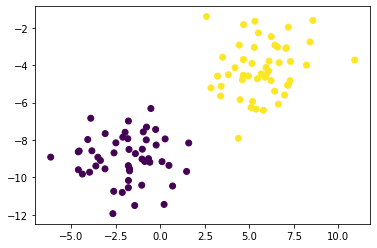

In [2]:
# Let's make some data
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2, cluster_std = 1.5, random_state = 40)

def plot_raw_data(X,y):
    plt.scatter(X[:,0], X[:,1], marker = 'o', c = y)
    plt.show()

plot_raw_data(X,y)

In [0]:
# For SVM we treat labels as 1 or -1, so we need to fix our labels
# Using the sklearn svm this isn't necessary however

svc = svm.SVC(kernel = "linear").fit(X, y)

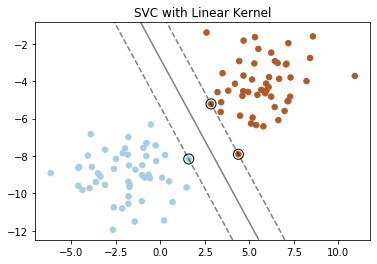

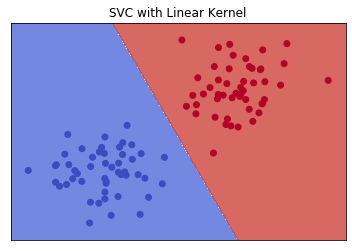

In [4]:
# Plot the decision boundary of the SVM

def plot_boundary(clf, X, y, clf_name):

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
    plt.title(clf_name)
    plt.show()


def plot_regions(clf, X, y, clf_name):
    # step size in mesh
    h = 0.02

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
        
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(clf_name)
    plt.show()

plot_boundary(svc, X, y, "SVC with Linear Kernel")
plot_regions(svc, X, y, "SVC with Linear Kernel")

We can also visualize what a gaussian kernel would make the decision boundary look like.

In [0]:
svc_RBF = svm.SVC(kernel = "rbf", gamma=0.7).fit(X, y)

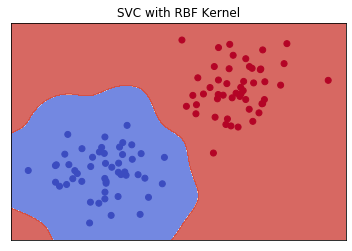

In [9]:
plot_regions(svc_RBF, X, y, "SVC with RBF Kernel")

Another aspect we can explore is changing C, a hyperparameter, when we run SVM.

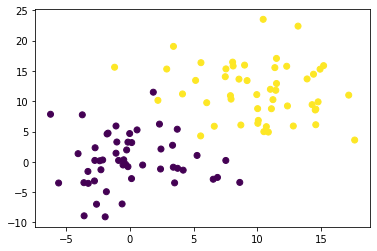

In [47]:
# Generate new data that is more noisy

X2, y2 = make_blobs(n_samples = 100, n_features = 2, centers = [[0,0],[12,12]], cluster_std = 4)
plot_raw_data(X2,y2)

In [0]:
# Let's run SVM with varying C values
c_vals = [0.1, 1, 10]
plot_titles = ["SVC, Linear Kernel, C = " + str(i) for i in c_vals]

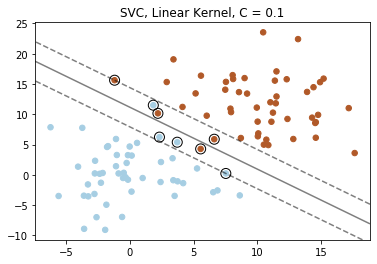

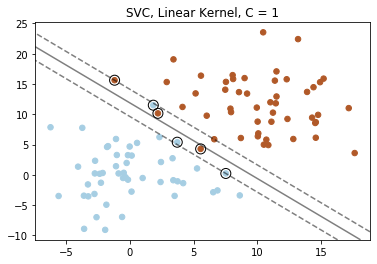

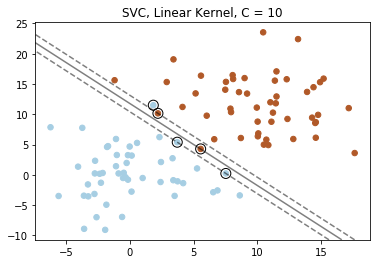

In [52]:
for i in range(len(c_vals)):
    plot_boundary(svm.SVC(kernel = "linear", C = c_vals[i]).fit(X2, y2), X2, y2, plot_titles[i])

We see in the original data that there is a purple dot that we can consider an outlier. For low C, the outlier doesn't skew the decision boundary, while in the higher C value, the SVM is more sensitive to the outlier.

We also see that for smaller C, the margin is larger while for the larger C the margin is much smaller.

Credit for visualization (sklearn documentation):


*   https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
*   https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html





Images:
*   https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72